In [20]:
from glob import glob
from matplotlib.image import imread
import matplotlib.pyplot as plt
import pandas as pd
import time, cv2
import numpy as np
from sklearn import manifold, decomposition
import seaborn as sns
from sklearn import cluster, metrics
import zipfile as zf

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from plot_keras_history import show_history, plot_history

In [21]:
def plot_comparatif(array) :
    
    print(array)
    
    print("Dimensions dataset avant réduction PCA : ", array.shape)
    pca = decomposition.PCA(n_components=0.99)
    feat_pca= pca.fit_transform(array)
    print("Dimensions dataset après réduction PCA : ", feat_pca.shape)
    
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
    X_tsne = tsne.fit_transform(feat_pca)
    df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
    
    print(df_tsne)
    df_tsne["class"] = raw["label"]
        
    cls = cluster.KMeans(n_clusters=7, random_state=6, n_init=10)
    cls.fit(X_tsne)
    df_tsne["cluster"] = cls.labels_
    
    print(df_tsne)
    
    fig = plt.figure(figsize=(15,6))

    ax = fig.add_subplot(121)
    sns.scatterplot(
        x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
        palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)
    plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
    plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
    plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
    plt.legend(bbox_to_anchor=(1,-0.2) ,prop={'size': 14}) 
    
    ax = fig.add_subplot(122)
    sns.scatterplot(
        x="tsne1", y="tsne2", hue="cluster", 
        palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6, data=df_tsne, legend="brief")
    plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
    plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
    plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
    plt.legend(bbox_to_anchor=(1,-0.2) ,prop={'size': 14}) 
    plt.show()
    
    labels = raw["label"]
    print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

    categories = set(labels)
    cat_to_num = {cat: i for i, cat in enumerate(categories)}
    labels_reel = np.array([cat_to_num[cat] for cat in labels])
    
    matrix = metrics.confusion_matrix(labels_reel, cls.labels_, labels = range(7))
    df = pd.DataFrame(matrix, index = list(set(labels)), columns = range(7))
    
    plt.figure(figsize=(15,10))
    sns.heatmap(df,annot=True)
    

# Exploration du jeu de données image

In [22]:
files = zf.ZipFile("Images.zip", 'r')
files.extractall("./Images_all/")
files.close()

In [23]:
raw = pd.read_csv("flipkart_com-ecommerce_sample_1050.csv")

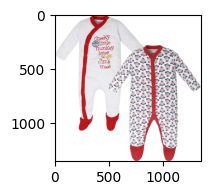

Key Features of FS Mini Klub Baby Boy's Sleepsuit Fabric: Cotton Brand Color: GREY,Specifications of FS Mini Klub Baby Boy's Sleepsuit General Details Sleeve Full Sleeve Bootie No Age Group 3 -  6 month Number of Contents in Sales Package Pack of 2 Fabric Cotton Pattern Printed Ideal For Baby Boy's Neck Round Neck


In [24]:
plt.subplot(131)
image = imread("./Images_all/Images/"+raw['image'][112])
plt.imshow(image)
plt.show()
print(raw['description'][112])

In [25]:
raw.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [26]:
labels = raw['product_category_tree'].apply(lambda x: x.split('>>')[0].split('"')[1])
raw['label'] = labels
raw = raw[['image','label']]

path = "./Images_all/Images/"
raw["image"] = path + raw["image"]

# Visualisation des données 

Home Furnishing 


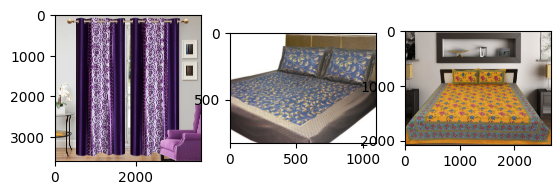

Baby Care 


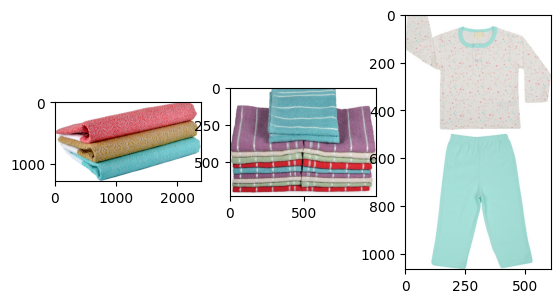

Watches 


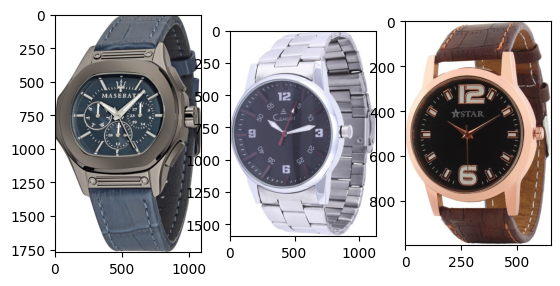

Home Decor & Festive Needs 


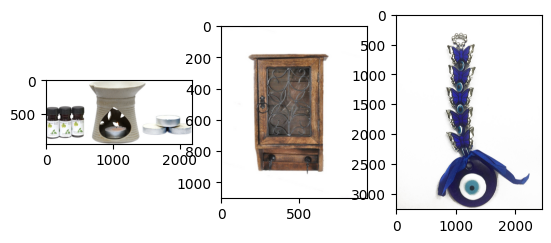

Kitchen & Dining 


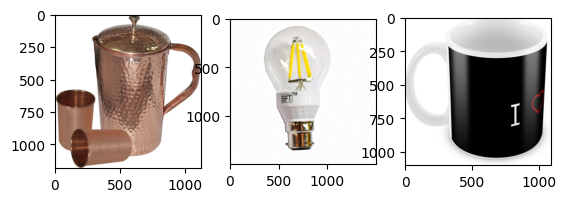

Beauty and Personal Care 


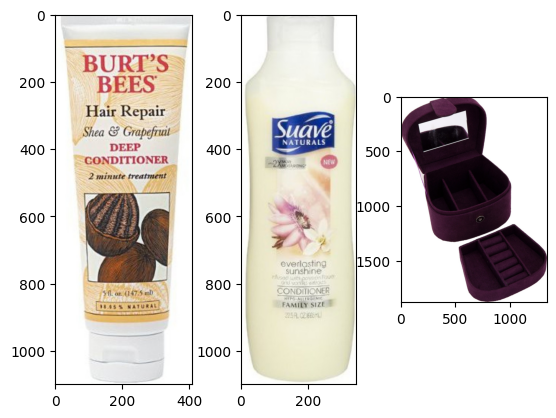

Computers 


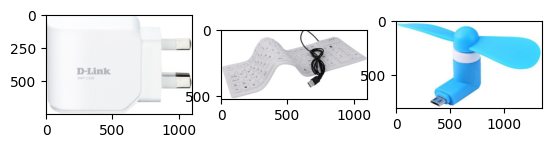

In [27]:
for label in raw["label"].unique() : 
    df = raw[raw["label"] == label].reset_index()
    print(label)
    for i in range(3) : 
        plt.subplot(130 + 1 + i)
        image = imread(df['image'][i])
        plt.imshow(image)
    plt.show()

# SIFT

In [28]:
import cv2


Image processing : convert in gray and equalize


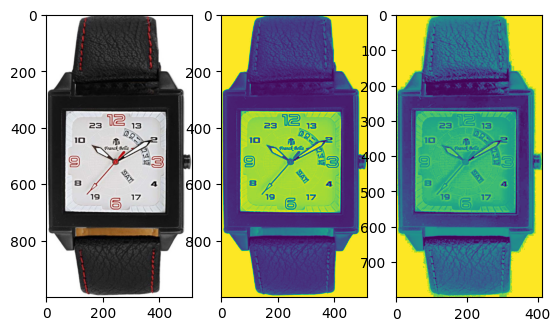

Détection des descripteurs


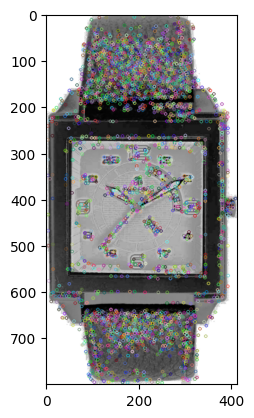

Descripteurs :  (3306, 128)

[[ 40.   0.   0. ...   0.   0.   1.]
 [ 32.   1.   0. ...   0.   0.   0.]
 [ 93.   4.   1. ...   0.   1.   3.]
 ...
 [ 24.  30.   5. ...   0.   0.  13.]
 [ 16. 125.  25. ...   1.   2.   8.]
 [  0. 104. 141. ...   0.   0.   0.]]


In [39]:
print("Image processing : convert in gray and equalize")
    
image = imread(raw['image'][22])
plt.subplot(131)
plt.imshow(image)
sift = cv2.SIFT_create()
image = cv2.imread(raw['image'][22],0) # convert in gray
# image = cv2.cvtColor(image,cv2.COLOR_BAYER_BG2GRAY)
plt.subplot(132)
plt.imshow(image)
image = cv2.equalizeHist(image)   # equalize image histogram
image = cv2.resize(image, (int(image.shape[1]*0.8),int(image.shape[0]*0.8)))

plt.subplot(133)
plt.imshow(image)
plt.show()

print("Détection des descripteurs")
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

In [13]:
sift_keypoints = []
temps1=time.time()
sift = cv2.SIFT_create(500)

for image_num in range(len(raw)) :
    if image_num%100 == 0 : print(image_num)
    image = raw['image'][image_num]
    image = cv2.imread(image,0) # convert in gray
    image = cv2.resize(image, (int(image.shape[1]*0.8),int(image.shape[0]*0.8)))# resize image for memory allocation 
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000


C:\Users\linae\AppData\Local\Temp\ipykernel_17420\3298502524.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sift_keypoints_by_img = np.asarray(sift_keypoints)



Nombre de descripteurs :  (508601, 128)
temps de traitement SIFT descriptor :           301.89 secondes


In [14]:
sift_keypoints_all

array([[ 25.,   1.,   0., ...,   1.,   0.,   0.],
       [ 42.,   5.,   4., ...,  46.,   1.,   1.],
       [  9.,  11.,  37., ...,  62.,   0.,   1.],
       ...,
       [  5.,   2.,  13., ...,   0.,   2.,  60.],
       [  0.,   6.,  35., ...,  24.,  25.,   8.],
       [ 33.,   0.,   6., ...,   2., 111.,  84.]], dtype=float32)

In [15]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  713
Création de 713 clusters de descripteurs ...


C:\Users\linae\anaconda3\envs\test_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


temps de traitement kmeans :            20.18 secondes


In [16]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             2.23 secondes


[[0.07185629 0.         0.         ... 0.         0.         0.        ]
 [0.006      0.         0.         ... 0.008      0.006      0.        ]
 [0.         0.         0.002      ... 0.         0.         0.        ]
 ...
 [0.002      0.         0.01       ... 0.002      0.002      0.002     ]
 [0.         0.01       0.002      ... 0.         0.         0.        ]
 [0.         0.00199203 0.         ... 0.         0.         0.0059761 ]]
Dimensions dataset avant réduction PCA :  (1050, 713)
Dimensions dataset après réduction PCA :  (1050, 502)
          tsne1      tsne2
0     11.084022  17.981926
1     25.626530   7.001509
2     -6.589884 -33.490349
3     27.549238   3.750448
4     26.897236  10.023988
...         ...        ...
1045  -9.671860   7.952141
1046 -27.657711 -24.011524
1047  -2.657096  12.261373
1048 -20.241470 -26.186529
1049  30.056671  18.048067

[1050 rows x 2 columns]
          tsne1      tsne2             class  cluster
0     11.084022  17.981926  Home Furnishing  

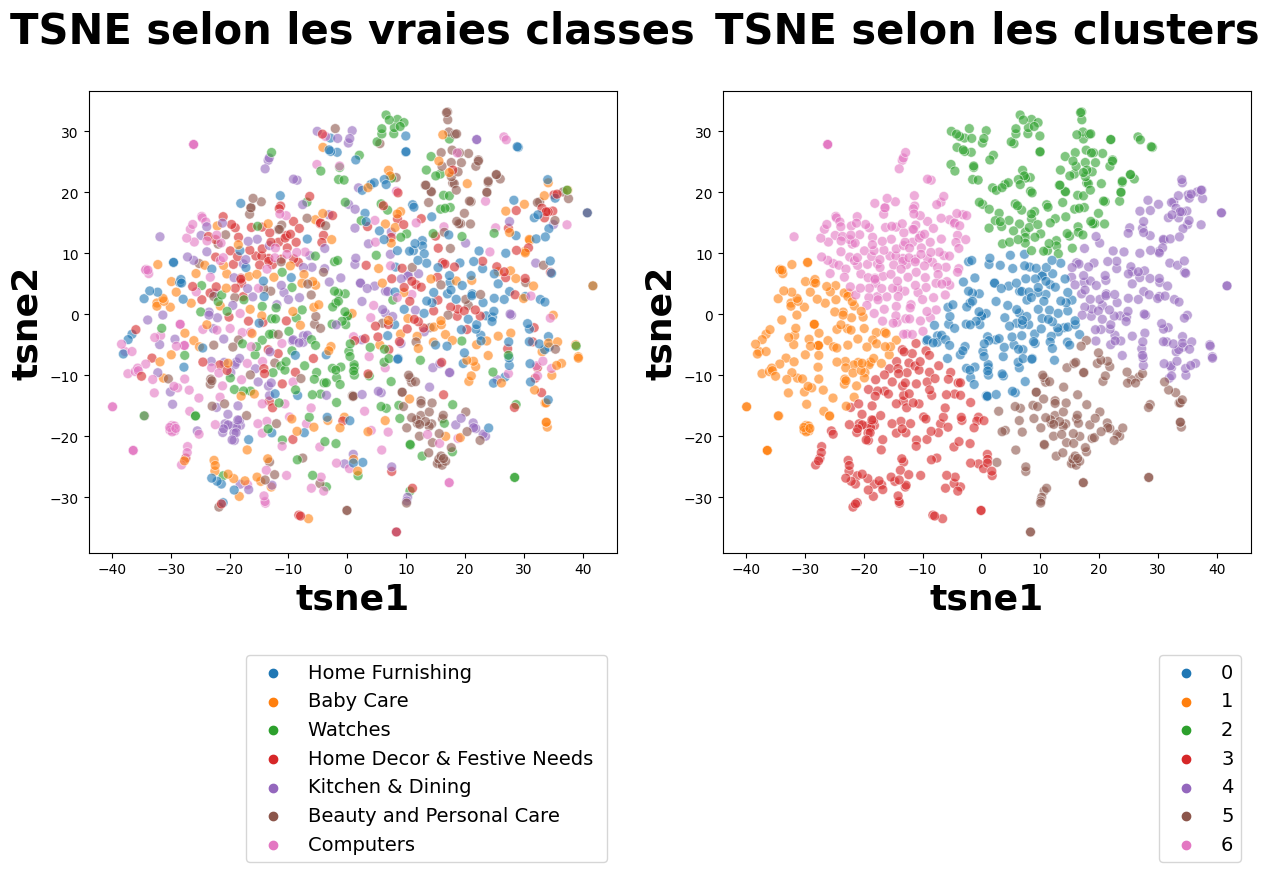

ARI :  0.05025073030164523


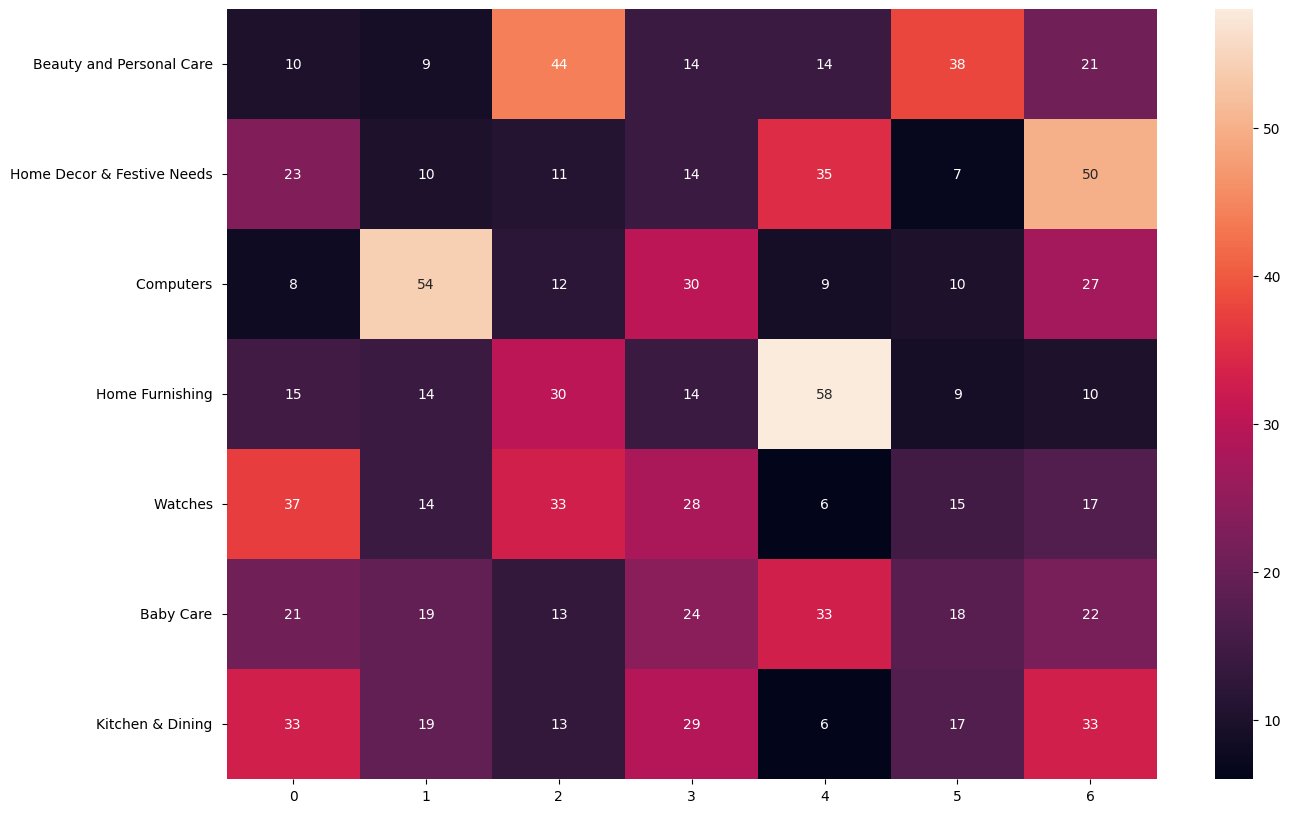

In [19]:
plot_comparatif(im_features)

# CNN VGG16

In [15]:
base_model = VGG16()
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
images_features = []
i=0 
for image_file in raw['image'] :
    if i%100 == 0 : print(i)
    i +=1
    image = load_img(image_file, target_size=(224, 224))
    image = img_to_array(image) 
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    images_features.append(model.predict(image, verbose=0)[0]) # predict from pretrained model

images_features = np.asarray(images_features)
images_features.shape

0
100
200
300
400
500
600


C:\Users\linae\anaconda3\envs\test_env\Lib\site-packages\PIL\Image.py:3176: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


700
800
900
1000


(1050, 4096)

Dimensions dataset avant réduction PCA :  (1050, 4096)
Dimensions dataset après réduction PCA :  (1050, 803)


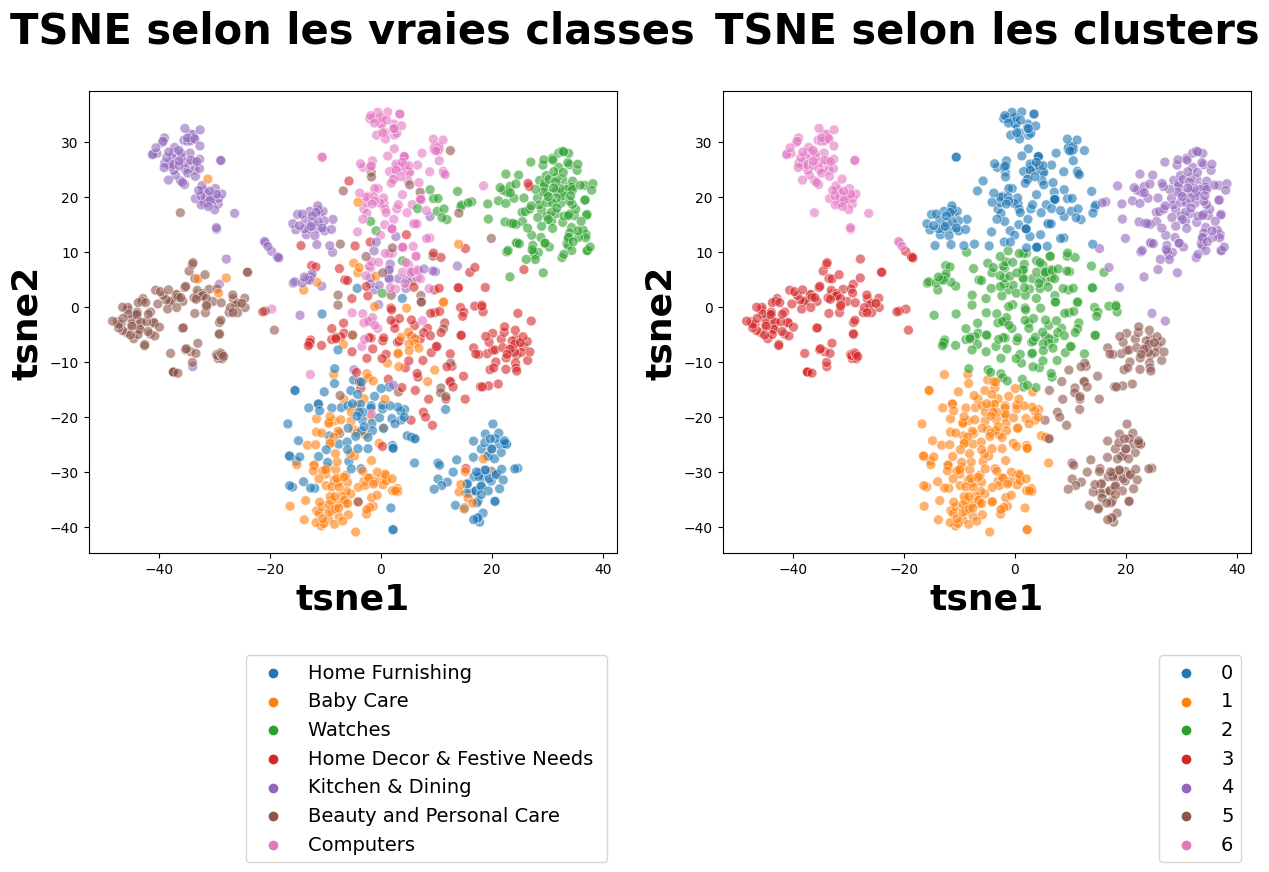

ARI :  0.4530854276851168


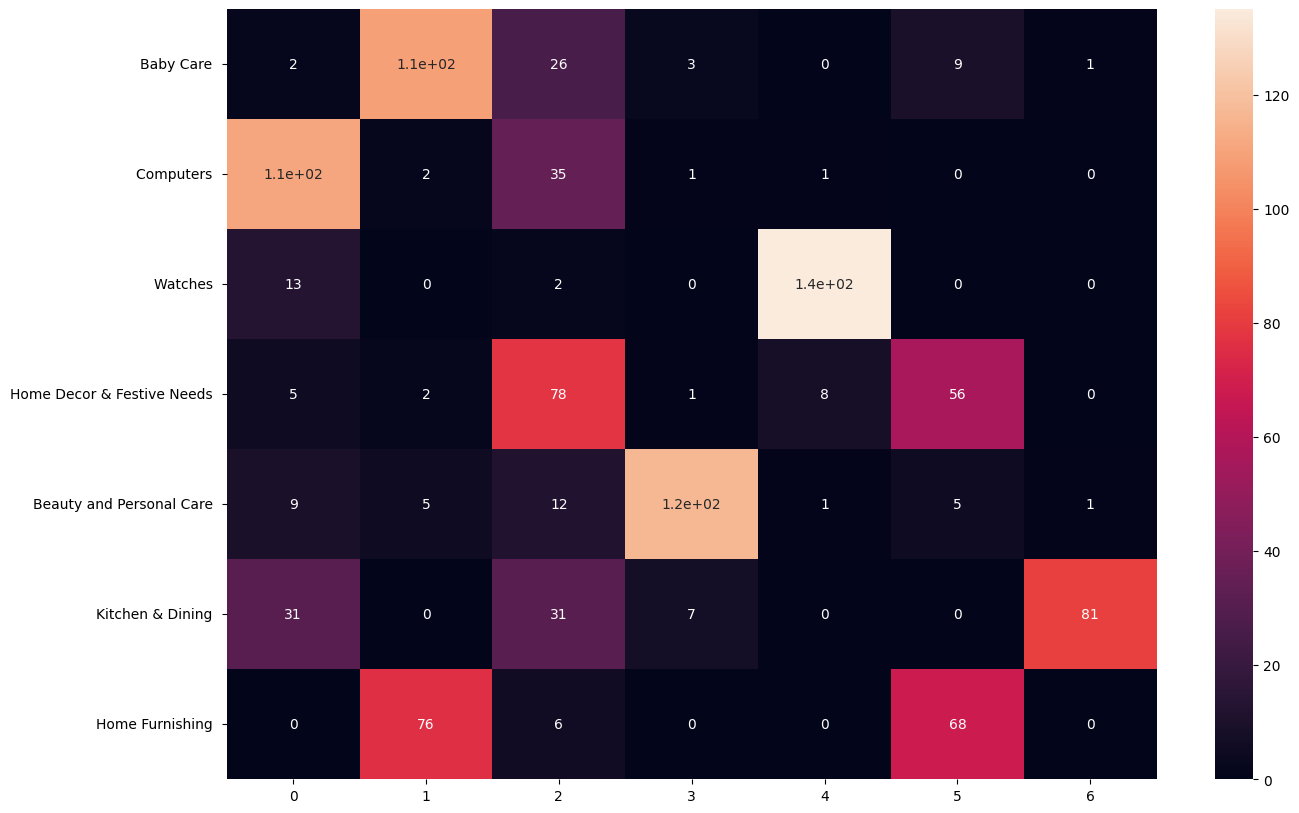

In [17]:
plot_comparatif(images_features)

# CNN resnet50

In [18]:
base_model = ResNet50()
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [19]:
images_features = []
i=0 
for image_file in raw['image'] :
    if i%100 == 0 : print(i)
    i +=1
    image = load_img(image_file, target_size=(224, 224))
    image = img_to_array(image) 
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    images_features.append(model.predict(image, verbose=0)[0]) # predict from pretrained model

images_features = np.asarray(images_features)
images_features.shape

0
100
200
300
400
500
600


C:\Users\linae\anaconda3\envs\test_env\Lib\site-packages\PIL\Image.py:3176: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


700
800
900
1000


(1050, 2048)

Dimensions dataset avant réduction PCA :  (1050, 2048)
Dimensions dataset après réduction PCA :  (1050, 722)


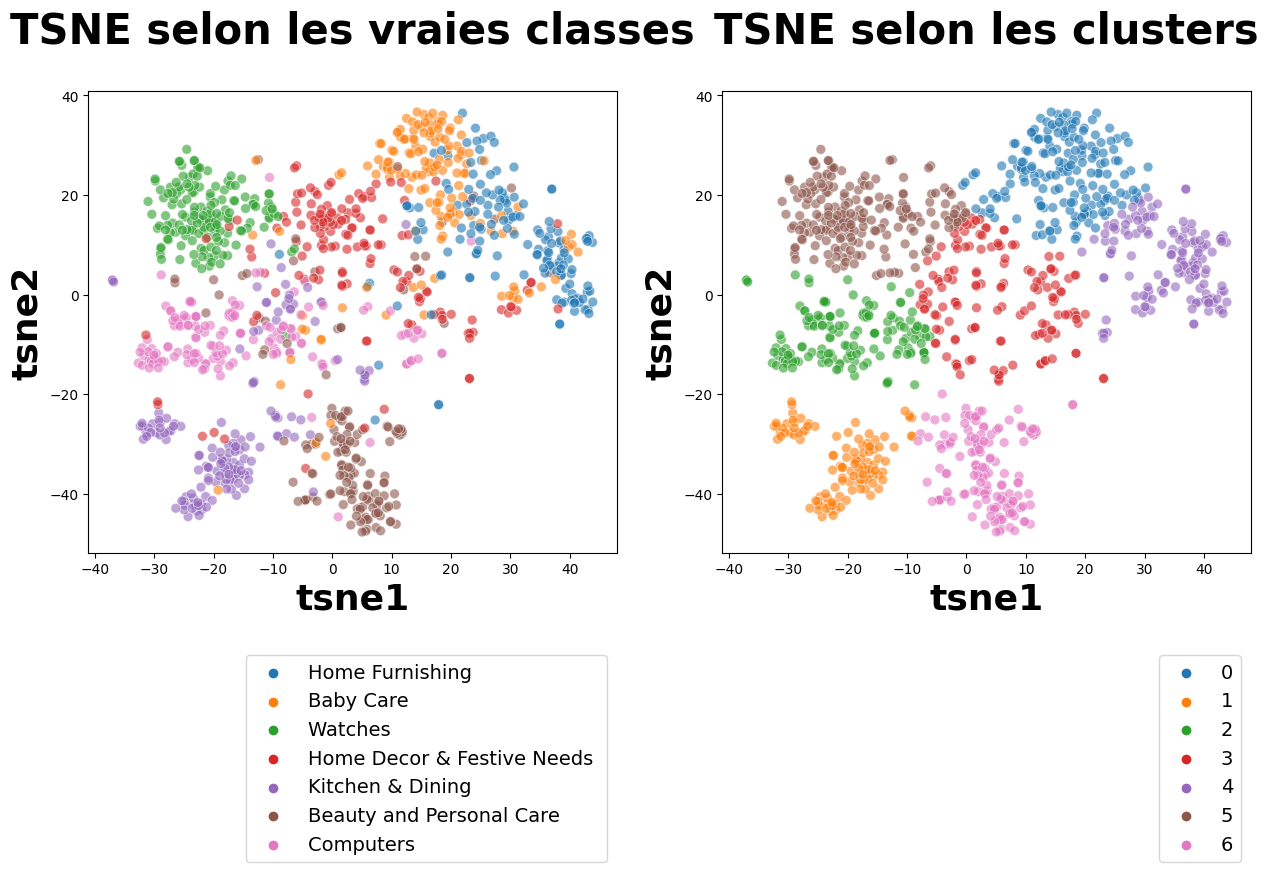

ARI :  0.5058159367594747


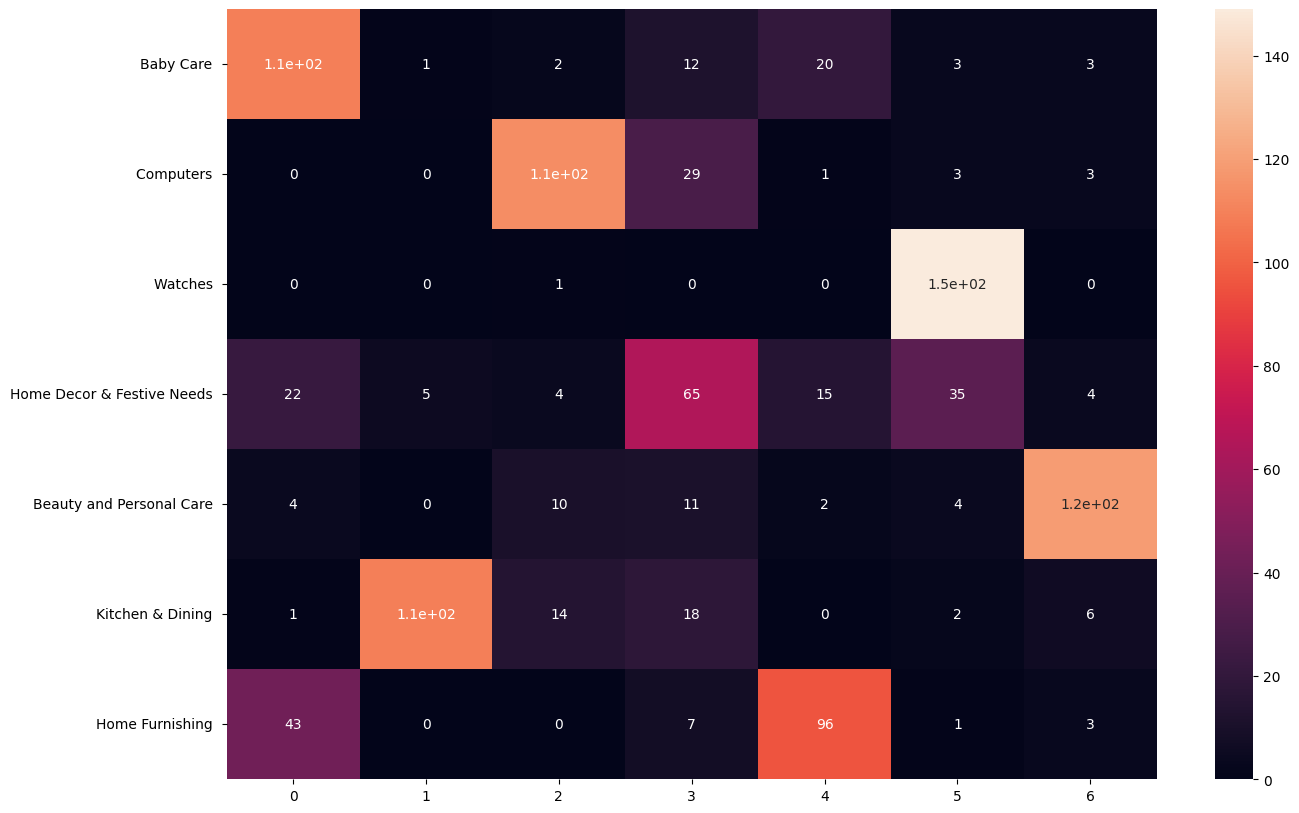

In [20]:
plot_comparatif(images_features)